Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# Importing Skin Cancer Data


To do: Take necessary actions to read the data
    
# Importing all the important libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
from IPython.display import display 
from time import time
import matplotlib.pyplot as plt
import seaborn as sns # Plotting library
import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from sklearn.datasets import load_files   
from tqdm import tqdm
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings("ignore")

#print(os.listdir("../assignment"))

In [6]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
import pathlib
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

#train_ds = "/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
#test_ds = "/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"


In [16]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

# Create a dataset
Define some parameters for the loader:

In [17]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [18]:

## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo
image_size = (img_height, img_width)
batch_size = 32
seed = 123

train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False
)


Found 2239 files belonging to 9 classes.


In [19]:

## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#val_ds = ##todo

image_size = (img_height, img_width)
batch_size = 32
seed = 123
validation_split = 0.2

val_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=validation_split,
    subset='validation',
    interpolation='bilinear',
    follow_links=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [20]:

# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

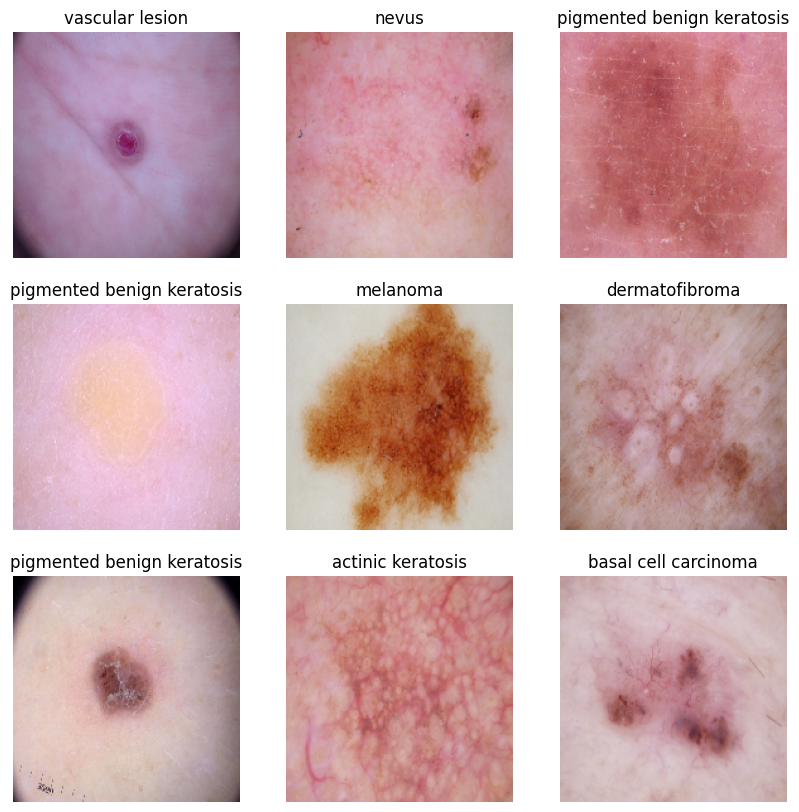

In [21]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

def visualize_data(dataset):
    class_labels = dataset.class_names
    x, y = next(iter(dataset))
    plt.figure(figsize=(10,10))
    for i, (img, label) in enumerate(zip(x, y), start=1):
        if i > 9:
            break
        ax = plt.subplot(3, 3, i)
        plt.imshow(img.numpy().astype("uint8"))
        plt.title(class_labels[np.argmax(label)])
        plt.axis("off")
    plt.show()

visualize_data(train_ds)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
### Your code goes here


image_size = (180, 180)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])



### Compile the model

Choose an appropirate optimiser and loss function for model training

In [24]:

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [25]:

# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

## Train the model

In [26]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 366s 3s/step - loss: 2.0881 - accuracy: 0.2126 - val_loss: 1.8715 - val_accuracy: 0.2483
Epoch 2/20
70/70 [==============================] - 178s 3s/step - loss: 1.9196 - accuracy: 0.2934 - val_loss: 1.7815 - val_accuracy: 0.3512
Epoch 3/20
70/70 [==============================] - 190s 3s/step - loss: 1.8203 - accuracy: 0.3359 - val_loss: 1.7158 - val_accuracy: 0.3960
Epoch 4/20
70/70 [==============================] - 178s 3s/step - loss: 1.6990 - accuracy: 0.4024 - val_loss: 1.6509 - val_accuracy: 0.3982
Epoch 5/20
70/70 [==============================] - 176s 3s/step - loss: 1.6379 - accuracy: 0.4131 - val_loss: 1.4860 - val_accuracy: 0.5034
Epoch 6/20
70/70 [==============================] - 177s 3s/step - loss: 1.5654 - accuracy: 0.4623 - val_loss: 1.4432 - val_accuracy: 0.5190
Epoch 7/20
70/70 [==============================] - 184s 3s/step - loss: 1.4825 - accuracy: 0.4873 - val_loss: 1.3507 - val_accuracy: 0.5190
Epoch 8/20
70

## Visualizing training results

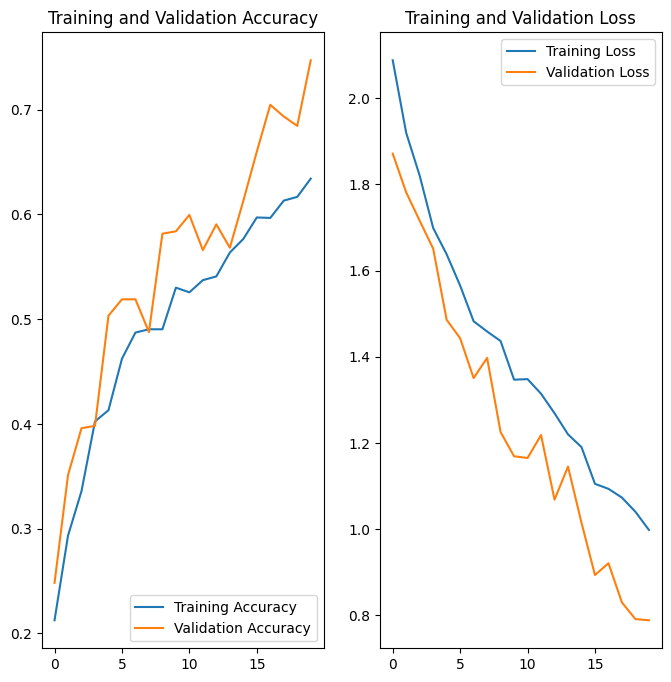

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
     

## Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

Write your findings here

Findings:

1. Training and Validation Accuracy:

The training accuracy increases consistently and reaches around 63.4%.

The validation accuracy increases initially but plateaus around 74.7%.

2. Training and Validation Loss:

The training loss decreases consistently and reaches a very low value.

The validation loss decreases initially but plateaus at a higher value compared to the training loss.

In [40]:
from keras.preprocessing.image import ImageDataGenerator

image_size = (180, 180)
batch_size = 32

# Create train & validation dataset with data augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Reuse the train_datagen for validation data since we're using the same directory with validation_split
validation_generator = train_datagen.flow_from_directory(
    data_dir_train,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)






Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


Random image path: /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0028662.jpg


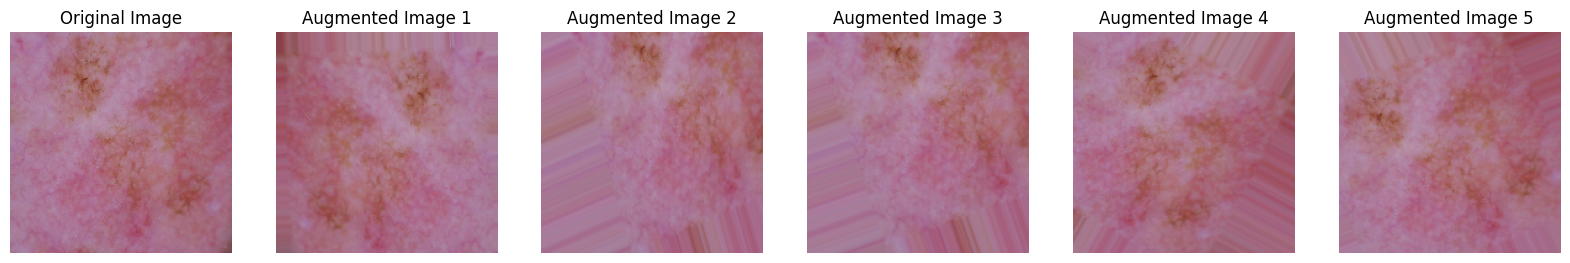

In [41]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

classes = os.listdir(data_dir_train)

# Pick a random class
random_class = random.choice(classes)
random_class_path = os.path.join(data_dir_train, random_class)

# Pick a random image from the selected class
random_image = random.choice(os.listdir(random_class_path))
random_image_path = os.path.join(random_class_path, random_image)

print("Random image path:", random_image_path)

example_image_path = random_image_path

original_image = load_img(example_image_path, target_size=image_size)
original_image_array = img_to_array(original_image)

# Create a temporary ImageDataGenerator with augmentation
temp_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation
augmented_images = temp_datagen.flow(np.expand_dims(original_image_array, axis=0), batch_size=1)

# Plot original and augmented images
plt.figure(figsize=(20, 6))
plt.subplot(1, 6, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

for i in range(2, 7):
    plt.subplot(1, 6, i)
    plt.imshow(augmented_images.next()[0])
    plt.title(f"Augmented Image {i-1}")
    plt.axis("off")

plt.show()

### Todo:

###Create the model, compile and train the model


In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])



Compiling the model

In [37]:

## Your code goes here
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training the model

In [38]:

## Your code goes here, note: train your model for 20 epochs

# Train the model

history_augmented = model.fit(train_generator,
                              epochs=20,
                              validation_data=validation_generator)

     

## Visualizing the results

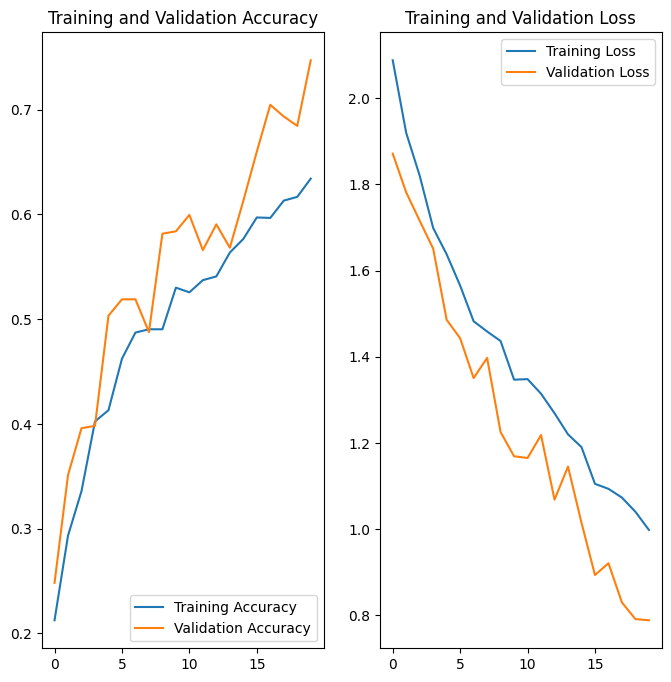

In [42]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Todo: Find the distribution of classes in the training dataset.

#### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

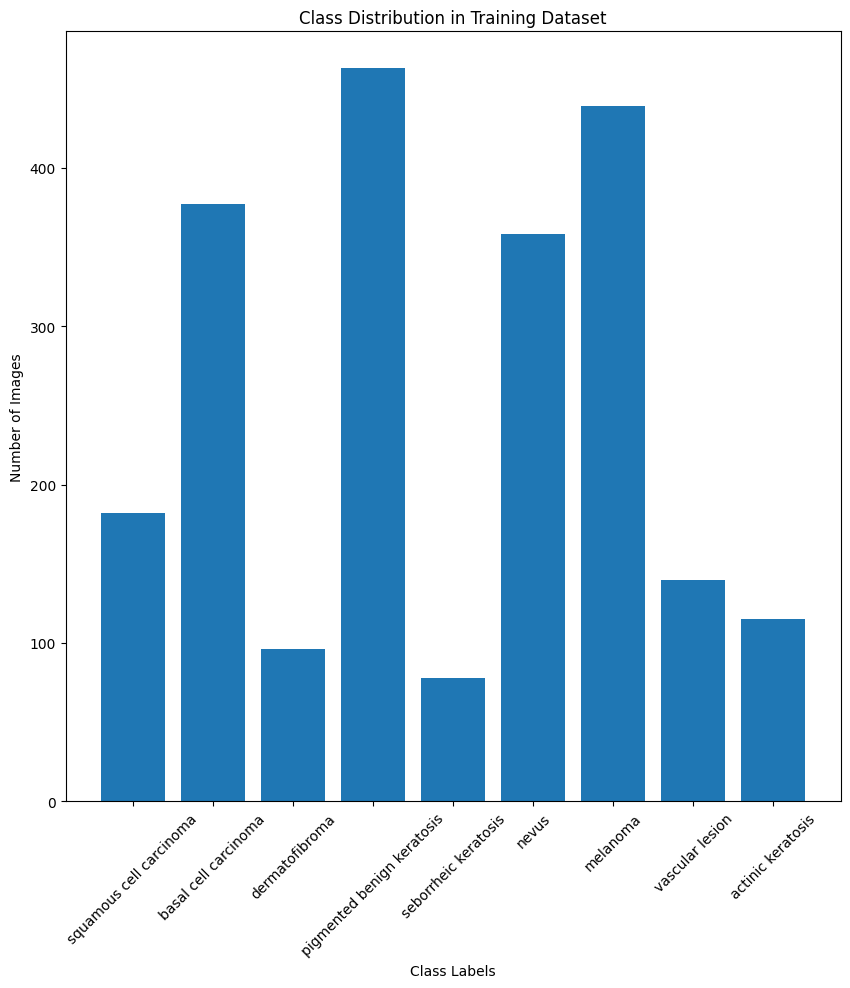

In [43]:
## Your code goes here.

import os
import matplotlib.pyplot as plt

def plot_class_distribution(generator):
    class_labels = generator.class_indices
    class_counts = {}

    for subdir in os.listdir(data_dir_train):
        subdir_path = os.path.join(data_dir_train, subdir)
        if os.path.isdir(subdir_path):
            class_counts[subdir] = len(os.listdir(subdir_path))
    plt.figure(figsize=(10,10))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xticks(rotation=45)
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution in Training Dataset')
    plt.show()

plot_class_distribution(train_generator)

Todo: Write your findings here:

- Which class has the least number of samples?

seborrheic keratoosis

- Which classes dominate the data in terms proportionate number of samples?

pigmented benign keratoosis

Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [45]:

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [46]:

path_to_training_dataset = data_dir_train


class_names = [folder for folder in os.listdir(path_to_training_dataset) if os.path.isdir(path_to_training_dataset.joinpath(folder))]

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset.joinpath(i)))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # We are adding 500 samples per class to make sure that none of the classes are sparse.
    

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1391DB6890>: 100%|██████████| 500/500 [00:38<00:00, 13.15 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1390DFE2F0>: 100%|██████████| 500/500 [00:36<00:00, 13.66 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F13907554B0>: 100%|██████████| 500/500 [00:36<00:00, 13.78 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1390D47E20>: 100%|██████████| 500/500 [00:37<00:00, 13.38 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1390B847F0>: 100%|██████████| 500/500 [01:03<00:00,  7.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F1390671B40>: 100%|██████████| 500/500 [02:19<00:00,  3.58 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2304x1536 at 0x7F139ABCE9B0>: 100%|██████████| 500/500 [02:07<00:00,  3.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F139811D0C0>: 100%|██████████| 500/500 [00:28<00:00, 17.28 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1390DF1E70>: 100%|██████████| 500/500 [00:29<00:00, 16.89 Samples/s]


##### Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [47]:

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


##### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
import os
from glob import glob

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list_new[:2]

['/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0033295.jpg_6e267b6f-0fc1-41a9-9228-ba245874eb5d.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026203.jpg_b19fda83-ceb5-4b57-aad0-2d9c905c4cfd.jpg']

In [49]:

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:2]

['squamous cell carcinoma', 'squamous cell carcinoma']

In [50]:

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [51]:

new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [52]:

new_df['Label'].value_counts()

squamous cell carcinoma       500
basal cell carcinoma          500
dermatofibroma                500
pigmented benign keratosis    500
seborrheic keratosis          500
nevus                         500
melanoma                      500
vascular lesion               500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

##### Todo: Train the model on the data created using Augmentor


In [53]:

batch_size = 32
img_height = 180
img_width = 180

##### Todo: Create a training dataset

In [54]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Todo: Create a validation dataset

In [55]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical')

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Todo: Create your model (make sure to include normalization)

In [56]:
## your code goes here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

##### Todo: Compile your model (Choose optimizer and loss function appropriately)

In [57]:

## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Todo: Train your model

In [58]:

epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds)

Epoch 1/50
169/169 [==============================] - 423s 2s/step - loss: 1.9592 - accuracy: 0.2782 - val_loss: 1.5514 - val_accuracy: 0.3756
Epoch 2/50
169/169 [==============================] - 412s 2s/step - loss: 1.6097 - accuracy: 0.3839 - val_loss: 1.4353 - val_accuracy: 0.4469
Epoch 3/50
169/169 [==============================] - 423s 2s/step - loss: 1.4633 - accuracy: 0.4366 - val_loss: 1.3599 - val_accuracy: 0.4736
Epoch 4/50
169/169 [==============================] - 421s 2s/step - loss: 1.3757 - accuracy: 0.4770 - val_loss: 1.2844 - val_accuracy: 0.5338
Epoch 5/50
169/169 [==============================] - 415s 2s/step - loss: 1.2434 - accuracy: 0.5328 - val_loss: 1.1666 - val_accuracy: 0.5494
Epoch 6/50
169/169 [==============================] - 416s 2s/step - loss: 1.1713 - accuracy: 0.5606 - val_loss: 1.0478 - val_accuracy: 0.6399
Epoch 7/50
169/169 [==============================] - 411s 2s/step - loss: 1.0614 - accuracy: 0.5987 - val_loss: 1.0285 - val_accuracy: 0.6303

##### Todo: Visualize the model results

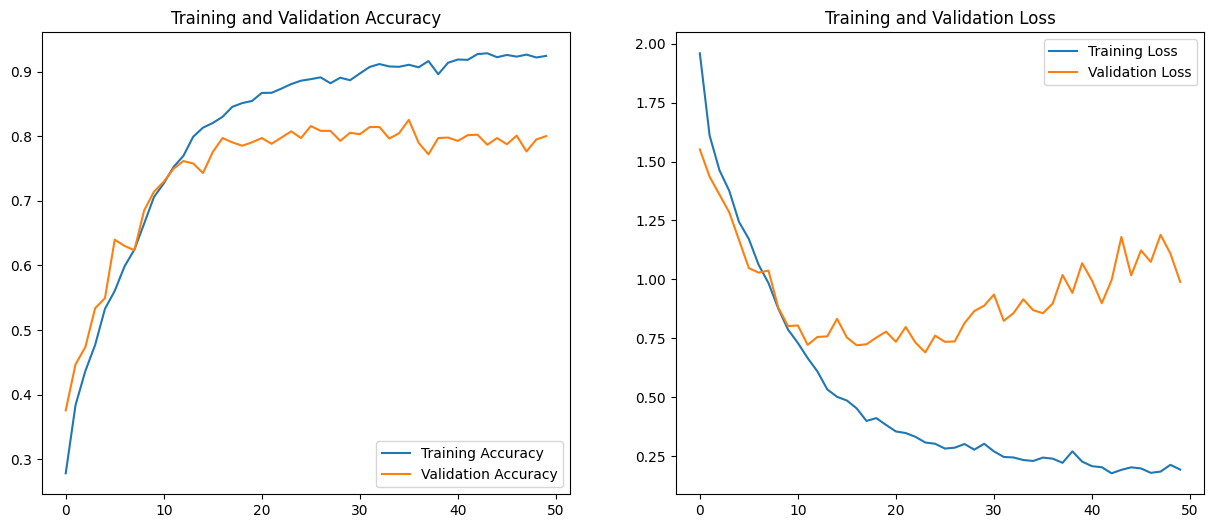

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Define epochs as the length of the acc list

plt.figure(figsize=(15, 6))  # Change the figure size to make the plot larger
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Accuracy of training and validation has been increased significantly due to augmentation and class imbalnce handling. The model is not overfitting. This model can be used as final model.

Training Accuracy: 92.45

Validation Accuracy: 80.03

The model seems to be overfitting, as the training accuracy is significantly higher than the validation accuracy, and the validation loss is higher than the training loss. This indicates that the model is learning the training data very well, but it is not generalizing well to the unseen validation data.

However, model can further be improved by tuning the hyperparameter,adding more nuerons/layers/dropout layers.